In [ ]:
# unzipping the dataset
# !unzip "drive/MyDrive/Dog Vision/dog-breed-identification_2.zip" -d "drive/MyDrive/Dog Vision/"

In [ ]:
# Import necessary tools
import tensorflow as tf
import tensorflow_hub as hub
print("TensorFlow version: ", tf.__version__)
print("TensorFlow Hub version: ", hub.__version__)

TensorFlow version:  2.9.2
TensorFlow Hub version:  0.12.0


In [ ]:
# Getting data ready
# Checking the labels of our data
import pandas as pd
labels_csv = pd.read_csv("drive/MyDrive/Dog Vision/labels.csv")
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
# Counts of images in each classes
labels_csv["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

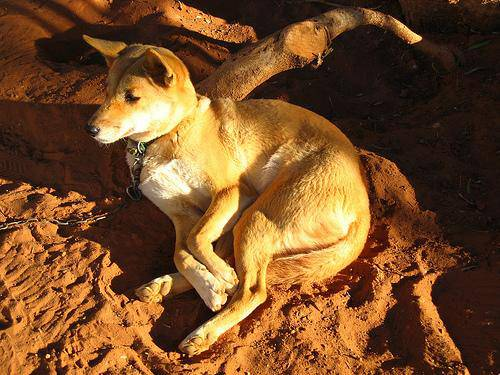

In [ ]:
# Image sample from the dataset
from IPython.display import Image
Image("drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

In [ ]:
# Create path names from image ID's
filenames = ["drive/MyDrive/Dog Vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]
filenames[:10]

['drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# Check whether the number of filenames matches the actual number of image files
import os
if len(os.listdir("drive/MyDrive/Dog Vision/train/")) == len(filenames):
  print("Filenames match amount of actual files!")
else:
  print("Filenames do not match amount of actual files!!") 

Filenames match amount of actual files!


In [ ]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
labels


array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
# Checking if number of labels matches the number of filnames
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("Number of labels does not match number of filenames!")

Number of labels matches number of filenames!


In [ ]:
# Find the unique label values
unique_breeds = np.unique(labels_csv["breed"])
len(unique_breeds)

120

In [ ]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:3]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

In [ ]:
# Setup X & y variables
X = filenames
y = boolean_labels

In [ ]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [ ]:
# Split the data into train and validation sets
from sklearn.model_selection import train_test_split 

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], 
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [ ]:
X_train[:3], y_train[:3]

(['drive/MyDrive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/MyDrive/Dog Vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, Fa

In [ ]:
# Preprocessing images (turning them into tensors)
IMG_SIZE = 224

def process_image(image_path, img_size=IMG_SIZE):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image


In [ ]:
# Returns a tuple (image, label)
def get_image_label(image_path, label):
  image = process_image(image_path)
  return image, label

In [ ]:
# Turning data into batches
BATCH_SIZE = 32

def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                                tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                                tf.constant(y)))
    # Shuffling the pathnames and labels
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples
    data = data.map(get_image_label)

    # Turnin the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [ ]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [ ]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [ ]:
# Visualizing data batches
import matplotlib.pyplot as plt

def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """

  plt.figure(figsize=(10, 10))
  for i in range(25):
    # Creat subplots (5X5)
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis("off")

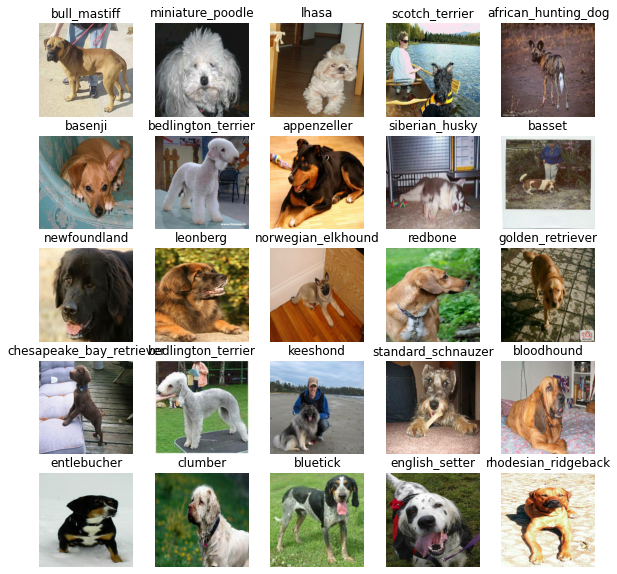

In [ ]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

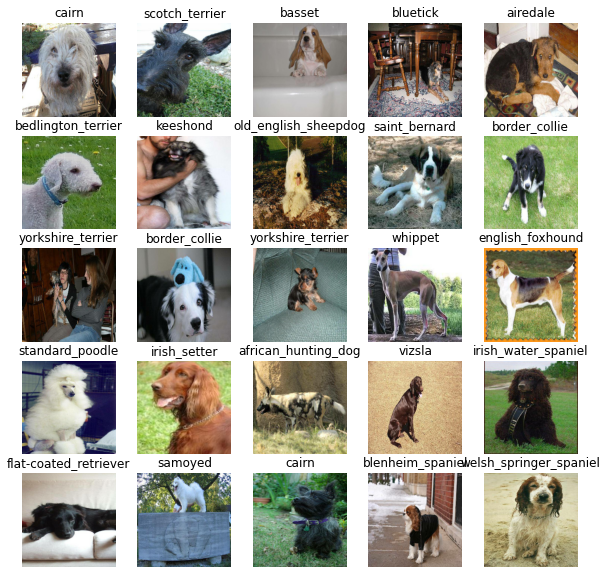

In [ ]:
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

In [ ]:
# Building a model

# Setting input shape
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, color channels

# Setting output shape
OUTPUT_SHAPE = len(unique_breeds)
        
# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"


In [ ]:
# Building a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Buliding model with: ", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

NameError: ignored

In [ ]:
model = create_model()
model.summary()

Buliding model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [ ]:
# TensorBoard Callback
# Loading TensorBoard notebook extension
%reload_ext tensorboard

In [ ]:
import datetime

def create_tensorboard_callback():
  logdir = os.path.join("drive/MyDrive/Dog Vision/logs",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

In [ ]:
NUM_EPOCHS = 20 #@param {type:"slider", min:10, max:100, step:10}

In [ ]:
# Training a model
def train_model():
  model = create_model()
  
  # Create new TensorBOard for every new session
  tensorboard = create_tensorboard_callback()

  # Fit the model
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Return the fitted model
  return model


In [ ]:
# Fit the model to the data
model = train_model()

Buliding model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/20
256/256 [==============================] - 39s 138ms/step - loss: 1.4798 - accuracy: 0.6435 - val_loss: 0.7201 - val_accuracy: 0.7878
Epoch 2/20
256/256 [==============================] - 36s 142ms/step - loss: 0.4140 - accuracy: 0.8781 - val_loss: 0.6625 - val_accuracy: 0.8034
Epoch 3/20
256/256 [==============================] - 36s 142ms/step - loss: 0.2400 - accuracy: 0.9362 - val_loss: 0.6467 - val_accuracy: 0.8137
Epoch 4/20
256/256 [==============================] - 37s 146ms/step - loss: 0.1496 - accuracy: 0.9687 - val_loss: 0.6493 - val_accuracy: 0.8127
Epoch 5/20
256/256 [==============================] - 41s 159ms/step - loss: 0.1029 - accuracy: 0.9814 - val_loss: 0.6754 - val_accuracy: 0.8103
Epoch 6/20
256/256 [==============================] - 46s 181ms/step - loss: 0.0748 - accuracy: 0.9874 - val_loss: 0.6701 - val_accuracy: 0.8186
Epoch 7/20
256/256 [================

In [ ]:
# Saving a model
def save_model(model, suffix=None):

  # Create model directory with current time
  modeldir = os.path.join("drive/MyDrive/Dog Vision/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
# Split the data into train and validation sets
from sklearn.model_selection import train_test_split 

X_train, X_val, y_train, y_val = train_test_split(X, 
                                                  y,
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(8177, 8177, 2045, 2045)

In [ ]:
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [ ]:
# Creating a model for full model
full_model  = create_model()

Buliding model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [ ]:
# Creating full model callbacks
full_model_tensorboard = create_tensorboard_callback()
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [ ]:
# Fit the full model to the full data
history = full_model.fit(x=train_data,
                         epochs=NUM_EPOCHS,
                         validation_data=val_data,
                         validation_freq=1,
                         callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/20
256/256 [==============================] - 100s 151ms/step - loss: 1.4998 - accuracy: 0.6474 - val_loss: 0.7180 - val_accuracy: 0.7814
Epoch 2/20
256/256 [==============================] - 37s 146ms/step - loss: 0.4123 - accuracy: 0.8813 - val_loss: 0.6801 - val_accuracy: 0.7907
Epoch 3/20
256/256 [==============================] - 35s 137ms/step - loss: 0.2343 - accuracy: 0.9398 - val_loss: 0.6392 - val_accuracy: 0.8108
Epoch 4/20
256/256 [==============================] - 36s 139ms/step - loss: 0.1501 - accuracy: 0.9678 - val_loss: 0.6615 - val_accuracy: 0.8064
Epoch 5/20
256/256 [==============================] - 37s 144ms/step - loss: 0.1013 - accuracy: 0.9829 - val_loss: 0.6494 - val_accuracy: 0.8083
Epoch 6/20
256/256 [==============================] - 38s 149ms/step - loss: 0.0719 - accuracy: 0.9908 - val_loss: 0.6654 - val_accuracy: 0.8054
Epoch 7/20
256/256 [==============================] - 36s 141ms/step - loss: 0.0558 - accuracy: 0.9939 - val_loss: 0.6816 - val_a

In [ ]:
save_model(full_model, suffix="all-images-Adam2")

Saving model to: drive/MyDrive/Dog Vision/models/20221016-17431665942196-all-images-Adam2.h5...


'drive/MyDrive/Dog Vision/models/20221016-17431665942196-all-images-Adam2.h5'

In [ ]:
# Function to load a model
def load_model(model_path):
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
# Load in the full model
loaded_full_model = load_model("drive/MyDrive/Dog Vision/models/20221016-17431665942196-all-images-Adam2.h5")

Loading saved model from: drive/MyDrive/Dog Vision/models/20221016-17431665942196-all-images-Adam2.h5


In [ ]:
# Load test image filenames
import os
test_path = "drive/MyDrive/Dog Vision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

test_filenames[:10]

['drive/MyDrive/Dog Vision/test/e291c3955198350ab26495e9290dbe34.jpg',
 'drive/MyDrive/Dog Vision/test/e57fded38af2f081403feefb324ed3a9.jpg',
 'drive/MyDrive/Dog Vision/test/e2b6d4957b62934bd831c3a1b65e2ebb.jpg',
 'drive/MyDrive/Dog Vision/test/e061b8d24e7b1324a6ac92ae81fdda19.jpg',
 'drive/MyDrive/Dog Vision/test/e25f28a6c07bf3909c4310b2685f6caf.jpg',
 'drive/MyDrive/Dog Vision/test/deac194013c246095f0e88cd8b6b90d2.jpg',
 'drive/MyDrive/Dog Vision/test/e293d06016cac647cd289e2008a4623a.jpg',
 'drive/MyDrive/Dog Vision/test/e57820007fcc2a07a5230177965a0f59.jpg',
 'drive/MyDrive/Dog Vision/test/e103930a8a4416f076c81a51907a7512.jpg',
 'drive/MyDrive/Dog Vision/test/dcb5d319bd013bbfa9779d8c6c11a829.jpg']

In [ ]:
len(test_filenames)

10357

In [ ]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [ ]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

324/324 [==============================] - 187s 554ms/step


In [ ]:
# Saving the predictions
np.savetxt("drive/My Drive/Dog Vision/preds_array.csv", test_predictions, delimiter=",")

In [ ]:
# Making predictions on custom images
# Get custom images filepaths
custom_path = "drive/MyDrive/Dog Vision/dogs/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [ ]:
# Turn custom image into batch
custom_data = create_data_batches(custom_image_paths, test_data=True)

Creating test data batches...


In [ ]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

1/1 [==============================] - 0s 460ms/step


In [ ]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  return unique_breeds[np.argmax(prediction_probabilities)]

In [ ]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['boston_bull', 'walker_hound']

In [ ]:
# Get custom images
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

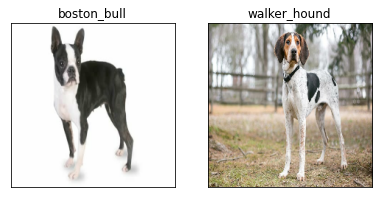

In [ ]:
# Check custom image predictions
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)

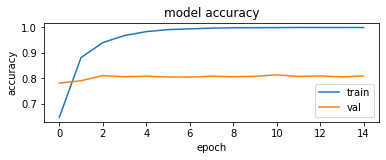

In [ ]:
# Plotting training/validation accuracy
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.savefig("drive/MyDrive/Dog Vision/accuracy.png");

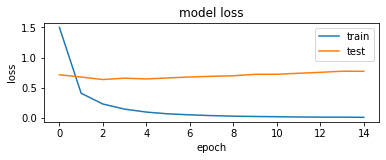

In [ ]:
# Plotting training/validation loss
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig("drive/MyDrive/Dog Vision/loss.png");